Subset team 1 and team 2 and append results to 1 DF

In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.ioff()
import seaborn as sns
plt.style.use('ggplot')
from datetime import date

In [135]:
main_df = pd.read_csv('spi_matches.csv', parse_dates=True)
main_df['date'] = pd.to_datetime(main_df['date'])


In [136]:
pl_2020 = main_df[(main_df['league'] ==  'Barclays Premier League') & (main_df['season'] == 2020)]
pl_2020.head()
#pl_2020.info()

,season,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,...,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
34049,2020,2020-09-12,2411,Barclays Premier League,Fulham,Arsenal,64.18,77.16,0.2817,0.4608,...,37.3,32.6,0.0,3.0,0.14,2.99,0.27,1.53,0.00,3.15
34065,2020,2020-09-12,2411,Barclays Premier League,Crystal Palace,Southampton,67.69,72.48,0.3698,0.3531,...,32.1,18.1,1.0,0.0,1.51,1.16,0.94,1.65,1.05,0.00
34106,2020,2020-09-12,2411,Barclays Premier League,Liverpool,Leeds United,91.07,64.09,0.8358,0.0438,...,55.5,35.5,4.0,3.0,3.33,0.37,3.01,0.75,4.20,3.15
34121,2020,2020-09-12,2411,Barclays Premier League,West Ham United,Newcastle,70.38,64.72,0.4887,0.2556,...,24.1,36.1,0.0,2.0,0.97,1.48,1.10,1.86,0.00,1.67
34177,2020,2020-09-13,2411,Barclays Premier League,West Bromwich Albion,Leicester City,61.67,79.02,0.2392,0.5013,...,38.5,38.3,0.0,3.0,0.41,2.85,0.46,0.66,0.00,2.72


In [137]:
pl_2020_team1 = pl_2020[['date', 'team1', 'score1', 'xg1', 'nsxg1', 'adj_score1']]
pl_2020_team1.columns = ['date', 'team', 'score', 'xg', 'nsxg', 'adj_score']
pl_2020_team2 = pl_2020[['date', 'team2', 'score2', 'xg2', 'nsxg2', 'adj_score2']]
pl_2020_team2.columns = ['date', 'team', 'score', 'xg', 'nsxg', 'adj_score']

In [138]:
print(pl_2020_team1.shape)
print(pl_2020_team2.shape)

(380, 6)
(380, 6)


In [139]:
pl_2020_xG = pl_2020_team1.append(pl_2020_team2)
pl_2020_xG.sort_values(by='date', ascending=True, inplace=True)
pl_2020_xG.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 760 entries, 34049 to 42595
Data columns (total 6 columns):
date         760 non-null datetime64[ns]
team         760 non-null object
score        328 non-null float64
xg           328 non-null float64
nsxg         328 non-null float64
adj_score    328 non-null float64
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 41.6+ KB


In [140]:
pl_2020_xG = pl_2020_xG[pl_2020_xG.date < date.today()]
pl_2020_xG.dropna(inplace=True)

C:\Users\jhoey\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  """Entry point for launching an IPython kernel.


In [141]:
xG_total = pl_2020_xG.groupby('team').sum()
xG_total['GP'] = pl_2020_xG.groupby('team').count()['date']

In [142]:
xG_total.reset_index(inplace=True)

In [143]:
xG_total.head()

,team,score,xg,nsxg,adj_score,GP
0,Arsenal,20.0,25.37,21.90,21.00,17
1,Aston Villa,29.0,30.64,25.40,28.76,15
2,Brighton and Hove Albion,21.0,26.64,24.88,21.50,17
3,Burnley,9.0,14.66,16.66,9.24,15
4,Chelsea,32.0,30.61,24.35,31.74,17


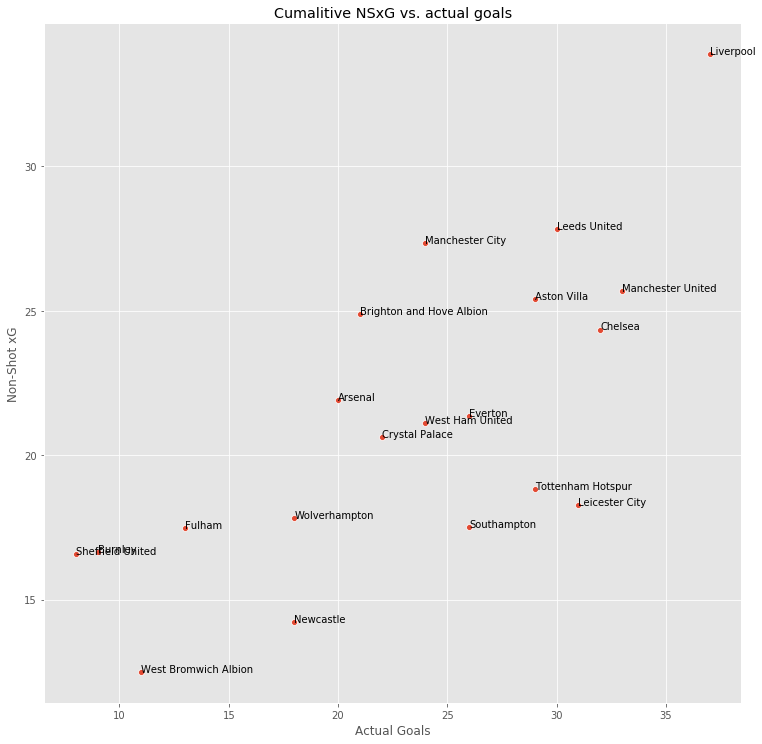

In [144]:
fig, ax = plt.subplots(figsize=(12.5,12.5))
ax = sns.scatterplot(data=xG_total, x='score', y='nsxg')

for i, txt in enumerate(xG_total['team']):
    ax.annotate(txt, (xG_total['score'][i], xG_total['nsxg'][i]))
plt.ylabel('Non-Shot xG')
plt.xlabel('Actual Goals')
plt.title('Cumalitive NSxG vs. actual goals')
plt.savefig('Cum_NSXGvsGS_210108.jpg')

In [145]:
xG_roll_5 = pl_2020_xG.groupby('team').rolling(5).sum()
print(test)

                     score    xg  nsxg  adj_score
team                                             
Arsenal       34049    NaN   NaN   NaN        NaN
              34379    NaN   NaN   NaN        NaN
              34801    NaN   NaN   NaN        NaN
              35034    NaN   NaN   NaN        NaN
              35331    8.0  7.18  5.96       8.40
...                    ...   ...   ...        ...
Wolverhampton 37726    5.0  6.07  5.47       5.25
              38036    5.0  5.81  5.65       5.25
              38215    4.0  4.61  5.70       4.20
              38272    4.0  4.63  5.54       4.20
              38371    7.0  5.14  4.91       7.35

[328 rows x 4 columns]


In [146]:
xG_roll_5 = xG_roll_5.groupby('team').last()
xG_roll_5.reset_index(inplace=True)

In [147]:
xG_roll_5

,team,score,xg,nsxg,adj_score
0,Arsenal,10.0,9.34,4.85,10.50
1,Aston Villa,8.0,11.75,8.43,7.19
2,Brighton and Hove Albion,6.0,8.08,8.72,6.09
3,Burnley,4.0,5.76,5.72,3.99
4,Chelsea,7.0,8.64,7.61,6.92
5,Crystal Palace,4.0,3.56,4.72,4.20
6,Everton,6.0,4.65,5.19,6.26
7,Fulham,2.0,4.93,4.33,2.10
8,Leeds United,13.0,9.34,8.58,12.78
9,Leicester City,7.0,7.15,5.48,7.30


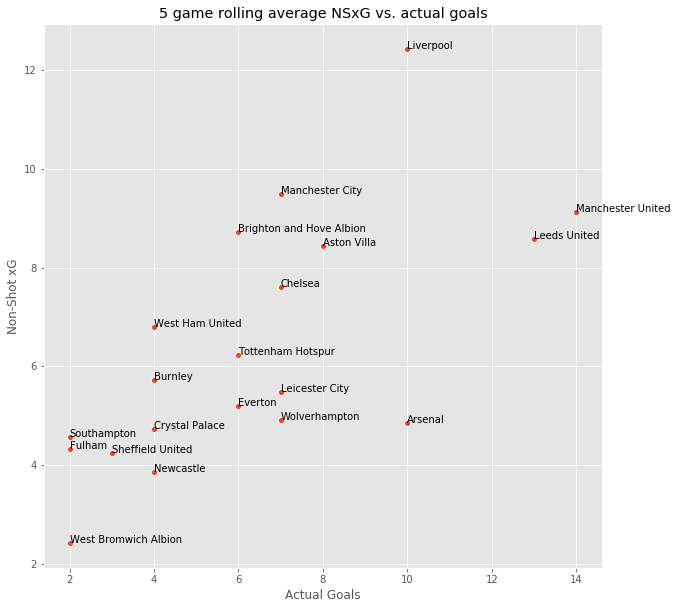

In [148]:
fig, ax2 = plt.subplots(figsize=(10,10))
ax2 = sns.scatterplot(data=xG_roll_5, x='score', y='nsxg')

for i, txt in enumerate(xG_roll_5['team']):
    ax2.annotate(txt, (xG_roll_5['score'][i], xG_roll_5['nsxg'][i]))
plt.ylabel('Non-Shot xG')
plt.xlabel('Actual Goals')
plt.title('5 game rolling average NSxG vs. actual goals')
plt.savefig('Roll5D_NSXGvsGS_210108.jpg')
plt.show()